In [75]:
import pandas as pd
from scipy.stats import ttest_ind

## Read Data


In [76]:
meeting_dataset = pd.read_csv(
    'data/dataset_collaboration_with_survey_scores.csv')

In [77]:
meeting_dataset = meeting_dataset[meeting_dataset['project'] == 4]

meeting_dataset = meeting_dataset[~((meeting_dataset['speaker_id'] == 5) | (
    meeting_dataset['next_speaker_id'] == 5))]

meeting_dataset

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
80,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,0,...,0.330335,0.098437,0.047005,0.051432,0.000022,9.955082e-07,2.854199e-05,1.293119e-05,3.0,4.0
81,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,1,...,0.330335,0.098437,0.047005,0.051432,0.000022,9.955082e-07,2.854199e-05,1.293119e-05,3.0,3.0
82,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,2,...,0.330335,0.098437,0.047005,0.051432,0.000022,9.955082e-07,2.854199e-05,1.293119e-05,3.0,3.0
83,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,3,...,0.330335,0.098437,0.047005,0.051432,0.000022,9.955082e-07,2.854199e-05,1.293119e-05,3.0,6.0
84,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,4,...,0.330335,0.098437,0.047005,0.051432,0.000022,9.955082e-07,2.854199e-05,1.293119e-05,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,4_12_SPEAKER_04,4,12,4,314,17930,2.700000,116.296296,4,0,...,0.198417,0.001003,0.000503,0.000500,0.000003,1.909801e-07,4.251515e-08,1.371728e-07,7.0,8.0
380,4_12_SPEAKER_04,4,12,4,314,17930,2.700000,116.296296,4,1,...,0.198417,0.001003,0.000503,0.000500,0.000003,1.909801e-07,4.251515e-08,1.371728e-07,7.0,6.0
381,4_12_SPEAKER_04,4,12,4,314,17930,2.700000,116.296296,4,2,...,0.198417,0.001003,0.000503,0.000500,0.000003,1.909801e-07,4.251515e-08,1.371728e-07,7.0,6.0
382,4_12_SPEAKER_04,4,12,4,314,17930,2.700000,116.296296,4,3,...,0.198417,0.001003,0.000503,0.000500,0.000003,1.909801e-07,4.251515e-08,1.371728e-07,7.0,9.0


In [78]:
num_meeting = meeting_dataset['speaker_id'].nunique()

In [79]:
# Read the dataset
chat_dataset = pd.read_csv('data/kakao_data.csv')

In [80]:
chat_dataset

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,weighted_network_density,gini_coefficient,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank
0,4_1_SPEAKER_00,4,1,0,1,22,24,0.041667,0,0,...,0.550000,0.200000,0.500000,0.20000,0.100000,0.100000,0.033333,0.033333,0.02015,0.009161
1,4_1_SPEAKER_00,4,1,0,1,22,24,0.041667,0,1,...,0.550000,0.200000,0.500000,0.20000,0.100000,0.100000,0.033333,0.033333,0.02015,0.009161
2,4_1_SPEAKER_00,4,1,0,1,22,24,0.041667,0,2,...,0.550000,0.200000,0.500000,0.20000,0.100000,0.100000,0.033333,0.033333,0.02015,0.009161
3,4_1_SPEAKER_00,4,1,0,1,22,24,0.041667,0,3,...,0.550000,0.200000,0.500000,0.20000,0.100000,0.100000,0.033333,0.033333,0.02015,0.009161
4,4_1_SPEAKER_00,4,1,0,1,22,24,0.041667,0,4,...,0.550000,0.200000,0.500000,0.20000,0.100000,0.100000,0.033333,0.033333,0.02015,0.009161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,4_11_SPEAKER_04,4,11,4,960,5474,48,20.000000,4,0,...,0.338095,0.278667,0.471454,0.19697,0.098485,0.098485,0.000000,0.000004,0.00013,0.000060
205,4_11_SPEAKER_04,4,11,4,960,5474,48,20.000000,4,1,...,0.338095,0.278667,0.471454,0.19697,0.098485,0.098485,0.000000,0.000004,0.00013,0.000060
206,4_11_SPEAKER_04,4,11,4,960,5474,48,20.000000,4,2,...,0.338095,0.278667,0.471454,0.19697,0.098485,0.098485,0.000000,0.000004,0.00013,0.000060
207,4_11_SPEAKER_04,4,11,4,960,5474,48,20.000000,4,3,...,0.338095,0.278667,0.471454,0.19697,0.098485,0.098485,0.000000,0.000004,0.00013,0.000060


## Analyzing Team Meeting Metrics: T-Test for Differences Chatting and Meeting


In [81]:
# Function to calculate team metrics adjusted for duplicated data
def calculate_team_meeting_metrics(meetings):
    # Removing duplicates by averaging values for each speaker per meeting
    unique_speech_frequencies = meetings.groupby(['meeting_number', 'speaker_id'])[
        'normalized_speech_frequency'].mean().reset_index()

    # Summing normalized speech frequencies per meeting
    meeting_metrics = unique_speech_frequencies.groupby('meeting_number').agg({
        'normalized_speech_frequency': 'sum'
    }).reset_index()

    # Summing interaction counts per meeting
    interaction_metrics = meetings.groupby('meeting_number').agg({
        'count': 'sum',
    }).reset_index()

    # Removing self interactions
    self_interactions = meetings[meetings['speaker_id']
                                 == meetings['next_speaker_id']]
    total_self_interactions = self_interactions.groupby(
        'meeting_number')['count'].sum().reset_index()
    interaction_metrics = interaction_metrics.merge(
        total_self_interactions, on='meeting_number', how='left', suffixes=('', '_self'))
    interaction_metrics['count'] = interaction_metrics['count'] - \
        interaction_metrics['count_self'].fillna(0)
    interaction_metrics.drop(columns=['count_self'], inplace=True)

    # Combining the metrics
    combined_metrics = meeting_metrics.merge(
        interaction_metrics, on='meeting_number')

    return combined_metrics


chat = calculate_team_meeting_metrics(chat_dataset)
meeting = calculate_team_meeting_metrics(meeting_dataset)
meeting, chat

(    meeting_number  normalized_speech_frequency  count
 0                1                  6062.016807    233
 1                2                  5393.385827    244
 2                3                  5103.684211    383
 3                4                  5049.000000    213
 4                5                  5401.621622    254
 5                6                  5748.965517    155
 6                7                  5074.528302    226
 7                8                  5616.617647    716
 8                9                  5627.333333   1296
 9               10                  5753.048780    677
 10              11                  6582.699387    913
 11              12                  4808.888889    270,
    meeting_number  normalized_speech_frequency  count
 0               1                     0.916667      4
 1               2                     5.777778     42
 2               3                     2.375000      7
 3               6                     1.500000    

In [82]:
def perform_ttest(group1, group2):
    ttest_results = {}
    ttest_results['normalized_speech_frequency'] = ttest_ind(
        group1['normalized_speech_frequency'], group2['normalized_speech_frequency'], equal_var=False)
    ttest_results['count'] = ttest_ind(
        group1['count'], group2['count'], equal_var=False)
    return ttest_results


def dataframe_generator(ttest_results, group1, group2):
    variables = ['normalized_speech_frequency', 'count']
    rows = []
    for var in variables:
        row_meeting = {
            'Variable': var,
            'Condition': 'Meeting',
            'Mean': group1[var].mean(),
            'Std': group1[var].std(),
            'df': len(group1[var]) - 1,
            't-statistic': ttest_results[var].statistic,
            'p-value': ttest_results[var].pvalue
        }
        row_chat = {
            'Variable': var,
            'Condition': 'Chat',
            'Mean': group2[var].mean(),
            'Std': group2[var].std(),
            'df': len(group2[var]) - 1,
            't-statistic': '',
            'p-value': ''
        }
        rows.append(row_meeting)
        rows.append(row_chat)

    detailed_df = pd.DataFrame(rows)
    return detailed_df

In [83]:
# Performing t-tests for team metrics
team_ttest_results = perform_ttest(meeting, chat)
team_ttest_results

{'normalized_speech_frequency': TtestResult(statistic=38.42744154392124, pvalue=3.227946191412998e-13, df=11.164591496353774),
 'count': TtestResult(statistic=2.6360401389985397, pvalue=0.016890201930348594, df=17.786006972019855)}

In [84]:
results_df = dataframe_generator(team_ttest_results, meeting, chat)
results_df

,Variable,Condition,Mean,Std,df,t-statistic,p-value
0,normalized_speech_frequency,Meeting,5518.482527,493.595841,11,38.427442,0.0
1,normalized_speech_frequency,Chat,22.526389,37.001260,8,,
2,count,Meeting,465.000000,357.754360,11,2.63604,0.01689
3,count,Chat,141.444444,199.001326,8,,


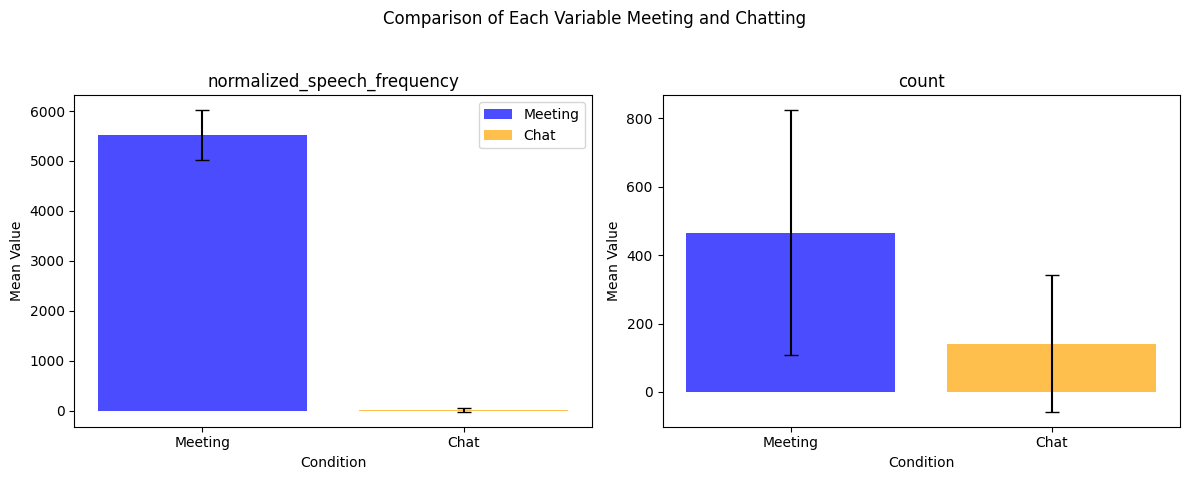

In [85]:
from matplotlib import pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

color_map = {'Meeting': 'blue', 'Chat': 'orange'}

variables = results_df['Variable'].unique()
for i, variable in enumerate(variables):
    subset = results_df[results_df['Variable'] == variable]
    for condition in ['Meeting', 'Chat']:
        condition_data = subset[subset['Condition'] == condition]
        axes[i].bar(condition, condition_data['Mean'], yerr=condition_data['Std'],
                    capsize=5, color=color_map[condition], alpha=0.7, label=condition if i == 0 else "")
    axes[i].set_title(variable)
    axes[i].set_xlabel('Condition')
    axes[i].set_ylabel('Mean Value')
    if i == 0:
        axes[i].legend()

fig.suptitle('Comparison of Each Variable Meeting and Chatting')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Calculating Individual Metrics Adjusted for Meeting Count: T-Test for Differences Chatting and Meeting


In [86]:
def calculate_individual_metrics(meetings, meeting_count):
    # Removing duplicates by averaging values for each speaker per meeting
    unique_speech_frequencies = meetings.groupby(['meeting_number', 'speaker_id'])[
        'normalized_speech_frequency'].mean().reset_index()

    # Summing normalized speech frequencies per speaker
    individual_metrics = unique_speech_frequencies.groupby('speaker_id').agg({
        'normalized_speech_frequency': 'sum'
    }).reset_index()
    individual_metrics['normalized_speech_frequency'] /= meeting_count

    # Summing interaction counts per speaker
    interaction_metrics = meetings.groupby('speaker_id').agg({
        'count': 'sum'
    }).reset_index()

    # Removing self interactions
    self_interactions = meetings[meetings['speaker_id']
                                 == meetings['next_speaker_id']]
    total_self_interactions = self_interactions.groupby(
        'speaker_id')['count'].sum().reset_index()
    interaction_metrics = interaction_metrics.merge(
        total_self_interactions, on='speaker_id', how='left', suffixes=('', '_self'))
    interaction_metrics['count'] = interaction_metrics['count'] - \
        interaction_metrics['count_self'].fillna(0)
    interaction_metrics.drop(columns=['count_self'], inplace=True)
    interaction_metrics['count'] /= meeting_count

    # Combining the metrics
    combined_metrics = individual_metrics.merge(
        interaction_metrics, on='speaker_id')

    return combined_metrics


meeting_individual_metrics = calculate_individual_metrics(meeting_dataset, 12)

chat_individual_metrics = calculate_individual_metrics(chat_dataset, 9)
meeting_individual_metrics, chat_individual_metrics

(   speaker_id  normalized_speech_frequency       count
 0           0                   832.942526  126.500000
 1           1                   425.550726   73.916667
 2           2                   188.595596   28.916667
 3           3                  3746.589336  176.000000
 4           4                   324.804343   59.666667,
    speaker_id  normalized_speech_frequency      count
 0           0                     3.030401  23.000000
 1           1                     2.476698  24.888889
 2           2                     0.690123  11.333333
 3           3                    12.646605  46.777778
 4           4                     3.682562  35.444444)

In [87]:
individual_ttest_results = perform_ttest(
    meeting_individual_metrics, chat_individual_metrics)
individual_ttest_results

{'normalized_speech_frequency': TtestResult(statistic=1.6420255420147487, pvalue=0.1759277857309138, df=4.0000783774658135),
 'count': TtestResult(statistic=2.418936035948591, pvalue=0.06677213931857863, df=4.422592979301375)}

In [88]:
results_df = dataframe_generator(individual_ttest_results,
                                 meeting_individual_metrics, chat_individual_metrics)
results_df

,Variable,Condition,Mean,Std,df,t-statistic,p-value
0,normalized_speech_frequency,Meeting,1103.696505,1496.842894,4,1.642026,0.175928
1,normalized_speech_frequency,Chat,4.505278,4.685186,4,,
2,count,Meeting,93.000000,58.294958,4,2.418936,0.066772
3,count,Chat,28.288889,13.417006,4,,


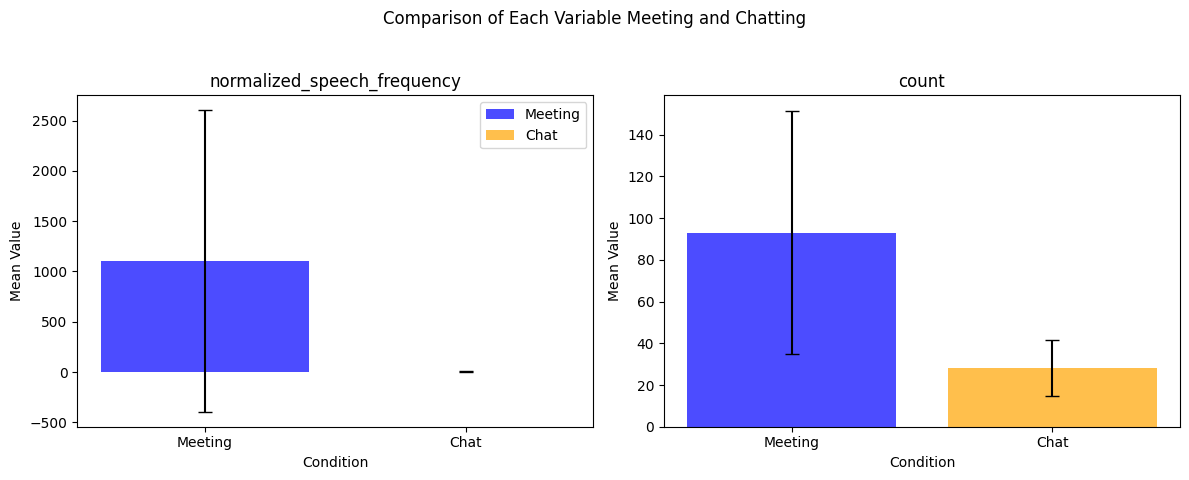

In [89]:
from matplotlib import pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

color_map = {'Meeting': 'blue', 'Chat': 'orange'}

variables = results_df['Variable'].unique()
for i, variable in enumerate(variables):
    subset = results_df[results_df['Variable'] == variable]
    for condition in ['Meeting', 'Chat']:
        condition_data = subset[subset['Condition'] == condition]
        axes[i].bar(condition, condition_data['Mean'], yerr=condition_data['Std'],
                    capsize=5, color=color_map[condition], alpha=0.7, label=condition if i == 0 else "")
    axes[i].set_title(variable)
    axes[i].set_xlabel('Condition')
    axes[i].set_ylabel('Mean Value')
    if i == 0:
        axes[i].legend()

fig.suptitle('Comparison of Each Variable Meeting and Chatting')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Individual Speaker Analysis: T-Test for Differences Chatting and Meeting


In [90]:
grouped_meet = meeting_dataset.groupby(['speaker_id', 'meeting_number'])[
    'normalized_speech_frequency'].mean().reset_index()
grouped_chat = chat_dataset.groupby(['speaker_id', 'meeting_number'])[
    'normalized_speech_frequency'].mean().reset_index()

In [91]:
import numpy as np
results = []

for speaker_id in range(num_meeting):
    meeting_speaker = grouped_meet[grouped_meet['speaker_id']
                                   == speaker_id]['normalized_speech_frequency']
    chatting_speaker = grouped_chat[grouped_chat['speaker_id']
                                    == speaker_id]['normalized_speech_frequency']
    t_statistic, p_value = ttest_ind(
        meeting_speaker, chatting_speaker)

    mean_before = np.mean(meeting_speaker)
    std_before = np.std(meeting_speaker)
    mean_after = np.mean(chatting_speaker)
    std_after = np.std(chatting_speaker)

    df = len(meeting_speaker) + len(chatting_speaker) - 2

    results.append({
        "Speaker ID": speaker_id,
        "Condition": "Meeting",
        "Mean": mean_before,
        "SD": std_before,
        "t-Statistic": t_statistic,
        "df": df,
        "p-Value": p_value
    })

    results.append({
        "Speaker ID": "",
        "Condition": "Chatting",
        "Mean": mean_after,
        "SD": std_after,
        "t-Statistic": "",
        "df": "",
        "p-Value": ""
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
results_df

,Speaker ID,Condition,Mean,SD,t-Statistic,df,p-Value
0,0,Meeting,832.942526,419.440520,5.645939,19,0.000019
1,,Chatting,3.030401,3.877950,,,
2,1,Meeting,425.550726,189.714738,5.979127,18,0.000012
3,,Chatting,2.786285,2.537054,,,
4,2,Meeting,188.595596,96.347797,5.230414,18,0.000057
5,,Chatting,0.776389,1.350245,,,
6,3,Meeting,3746.589336,595.285157,17.890215,19,0.0
7,,Chatting,12.646605,21.656339,,,
8,4,Meeting,324.804343,159.178485,5.75364,19,0.000015
9,,Chatting,3.682562,5.998216,,,


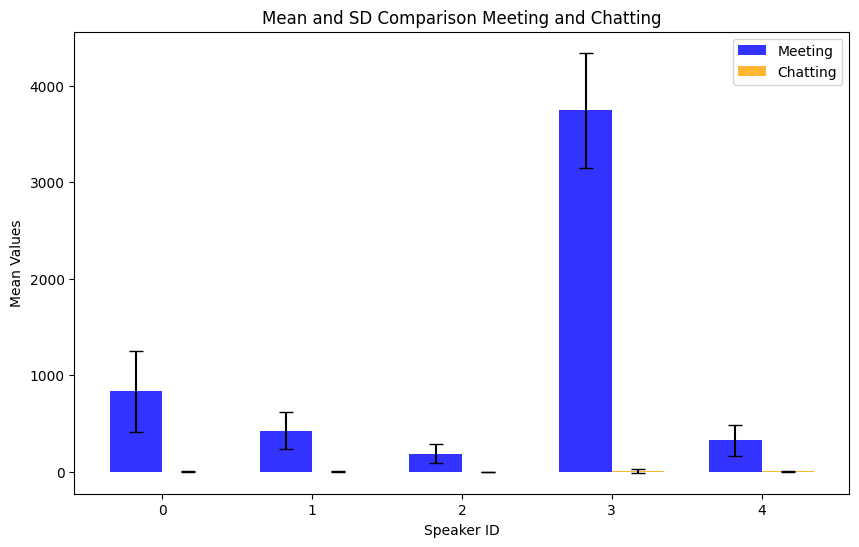

In [92]:
Meeting_means = results_df[results_df['Condition'] == 'Meeting']['Mean']
after_means = results_df[results_df['Condition'] == 'Chatting']['Mean']
Meeting_sds = results_df[results_df['Condition'] == 'Meeting']['SD']
after_sds = results_df[results_df['Condition'] == 'Chatting']['SD']
speaker_ids = results_df[results_df['Condition']
                         == 'Meeting']['Speaker ID'].unique()

fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(speaker_ids))
bar_width = 0.35

rects1 = ax.bar(index, Meeting_means, bar_width, yerr=Meeting_sds,
                color='blue', label='Meeting', alpha=0.8, capsize=5)
rects2 = ax.bar(index + bar_width, after_means, bar_width,
                yerr=after_sds, color='orange', label='Chatting', alpha=0.8, capsize=5)

ax.set_xlabel('Speaker ID')
ax.set_ylabel('Mean Values')
ax.set_title('Mean and SD Comparison Meeting and Chatting')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(speaker_ids)
ax.legend()

plt.show()

In [93]:
grouped_meet = meeting_dataset.groupby(['speaker_id', 'meeting_number'])[
    'count'].sum().reset_index()
grouped_chat = chat_dataset.groupby(['speaker_id', 'meeting_number'])[
    'count'].sum().reset_index()

In [94]:
import numpy as np
results = []

for speaker_id in range(num_meeting):
    meeting_speaker = grouped_meet[grouped_meet['speaker_id']
                                   == speaker_id]['count']
    chatting_speaker = grouped_chat[grouped_chat['speaker_id']
                                    == speaker_id]['count']
    t_statistic, p_value = ttest_ind(
        meeting_speaker, chatting_speaker)

    mean_before = np.mean(meeting_speaker)
    std_before = np.std(meeting_speaker)
    mean_after = np.mean(chatting_speaker)
    std_after = np.std(chatting_speaker)

    df = len(meeting_speaker) + len(chatting_speaker) - 2

    results.append({
        "Speaker ID": speaker_id,
        "Condition": "Meeting",
        "Mean": mean_before,
        "SD": std_before,
        "t-Statistic": t_statistic,
        "df": df,
        "p-Value": p_value
    })

    results.append({
        "Speaker ID": "",
        "Condition": "Chatting",
        "Mean": mean_after,
        "SD": std_after,
        "t-Statistic": "",
        "df": "",
        "p-Value": ""
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
results_df

,Speaker ID,Condition,Mean,SD,t-Statistic,df,p-Value
0,0,Meeting,130.250000,117.605361,1.982301,19,0.062097
1,,Chatting,44.333333,44.204072,,,
2,1,Meeting,76.166667,63.203156,1.112875,18,0.280404
3,,Chatting,46.000000,44.087980,,,
4,2,Meeting,29.833333,11.319845,1.506524,18,0.149281
5,,Chatting,16.500000,25.568535,,,
6,3,Meeting,410.666667,434.440317,2.115592,19,0.047813
7,,Chatting,79.555556,119.575277,,,
8,4,Meeting,67.333333,62.180293,0.513284,19,0.613669
9,,Chatting,50.222222,83.130123,,,


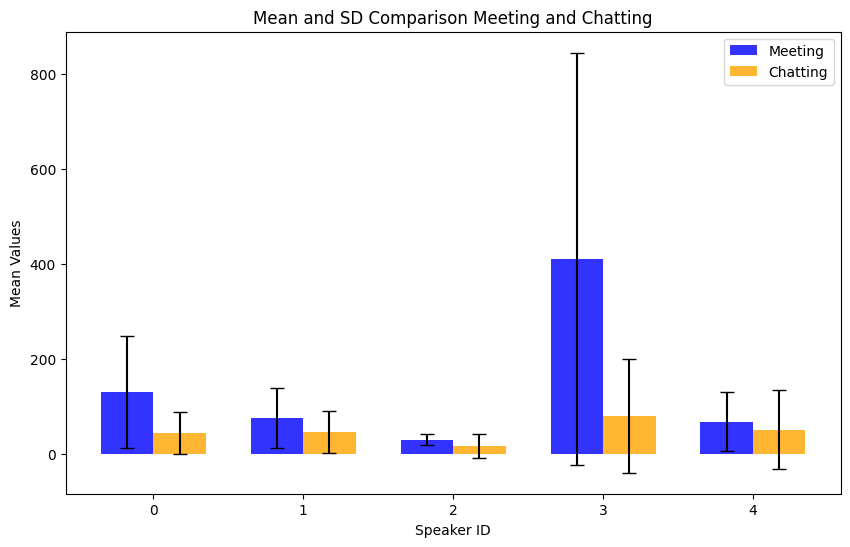

In [95]:
Meeting_means = results_df[results_df['Condition'] == 'Meeting']['Mean']
after_means = results_df[results_df['Condition'] == 'Chatting']['Mean']
Meeting_sds = results_df[results_df['Condition'] == 'Meeting']['SD']
after_sds = results_df[results_df['Condition'] == 'Chatting']['SD']
speaker_ids = results_df[results_df['Condition']
                         == 'Meeting']['Speaker ID'].unique()

fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(speaker_ids))
bar_width = 0.35

rects1 = ax.bar(index, Meeting_means, bar_width, yerr=Meeting_sds,
                color='blue', label='Meeting', alpha=0.8, capsize=5)
rects2 = ax.bar(index + bar_width, after_means, bar_width,
                yerr=after_sds, color='orange', label='Chatting', alpha=0.8, capsize=5)

ax.set_xlabel('Speaker ID')
ax.set_ylabel('Mean Values')
ax.set_title('Mean and SD Comparison Meeting and Chatting')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(speaker_ids)
ax.legend()

plt.show()